## Pandas

### Instructions

This assignment will be done completely inside this Jupyter notebook with answers placed in the cell provided.

All python imports that are needed shown.

Follow all the instructions in this notebook to complete these tasks.    

Make sure the CSV data files is in the same folder as this notebook - alumni.csv, groceries.csv

In [1]:
# Imports needed to complete this assignment
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling as pp 

### Question 1 :  Import CSV file (1 Mark)


Write code to load the alumni csv dataset into a Pandas DataFrame called 'alumni'.


In [2]:
#q1 (1)
# Read csv file from Remote repository
dataset = pd.read_csv ('https://raw.githubusercontent.com/regan-mu/Africa-Data-School-Nov-2021-Cohort/master/Assignment-1-ADS-Nov/alumni.csv')
dataset.head()
# Create csv file on local repository from remote csv file
dataset.to_csv('alumni.csv',index=False)
# Set dynamic filepath directory
pwd = os.getcwd()
# Read new csv file from local repository
df = pd.read_csv(pwd + "/alumni.csv")

### Question 2 :  Understand the data set (5 Marks)

Use the following pandas commands to understand the data set: a) head, b) tail, c) dtypes, d) info, e) describe 

In [3]:
#a) (1)
# Read the first 5 rows of the dataset  
# 8 Series in the dataset, Gender got 2 categorical variables, Marital Status got 3 categorical variables, Diploma Type got 2, Defaulted is a
# binomial categorial variable, Salary has continuous variables, same goes to Fee and Savings.
df.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [4]:
#b) (1)
# Read the last 5 rows of the dataset 
# The Gender series has an additional categorial variable of 'M' noted. 
df.tail()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [5]:
#c) (1)
# Understand the data structure of the various series used in the dataset 
# Year series needs to be changed to date format, Savings series changed to integer 
df.dtypes

Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

In [6]:
#d) (1)
# No missing values observed; Savings ($) and Year Graduated series data formats need to be converted to integers and date respectively
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Graduated  88 non-null     int64 
 1   Gender          88 non-null     object
 2   Marital Status  88 non-null     object
 3   Diploma Type    88 non-null     object
 4   Defaulted       88 non-null     object
 5   Salary          88 non-null     int64 
 6   Fee             88 non-null     int64 
 7   Savings ($)     88 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


In [7]:
#e) (1)
df.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


### Question 3 :  Cleaning the data set - part A (3 Marks)

a) Use clean_currency method below to strip out commas and dollar signs from Savings ($) column and put into a new column called 'Savings'.

In [8]:
# Made Copy of the dataset for experimentation. Good practice incase I make a mistake
df_copy = df.copy()
df_copy

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"
...,...,...,...,...,...,...,...,...
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"


In [9]:
def clean_currency(curr):
    """Function used to remove both the 
    ($) sign and (,) from the values under
    """
    return float(curr.replace(",", "").replace("$", ""))

clean_currency("$66,000")
 

66000.0

In [10]:
#a) (2) Use the lambda & 'f strings' function to apply def function to entire row.
df_copy['Savings'] = df_copy['Savings ($)'].apply(lambda x: f'{clean_currency(x)}')
df_copy.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000.0
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000.0
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000",76000.0
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000",52000.0


b) Uncomment 'alumni.dtypes.Savings' to check that the type change has occurred

In [11]:
#b) (1)
df_copy.dtypes.Savings

dtype('O')

### Question 4 :  Cleaning the data set - part B (5 Marks)

a) Run the 'alumni["Gender"].value_counts()' to see the incorrect 'M' fields that need to be converted to 'Male'

In [12]:
# a) (1)
# There are three values of 'M' variable that need to be converted into 'Male'
df_copy['Gender'].value_counts()

Male      46
Female    39
M          3
Name: Gender, dtype: int64

b) Now use a '.str.replace' on the 'Gender' column to covert the incorrect 'M' fields. Hint: We must use ^...$ to restrict the pattern to match the whole string. 

In [13]:
# b) (1)
# Replace the 'M' in the Gender series with "Male"
df_copy['Gender'].replace("M", "Male")

0       Male
1       Male
2     Female
3       Male
4     Female
       ...  
83      Male
84      Male
85      Male
86    Female
87      Male
Name: Gender, Length: 88, dtype: object

In [14]:
# b) (1)
df_copy['Gender'].unique()

array(['Male', 'Female', 'M'], dtype=object)

c) That didn't the set alumni["Gender"] column however. You will need to update the column when using the replace command 'alumni["Gender"]=<replace command>', show how this is done below

In [15]:
# c) (1)
#Undate the 'Gender' series and replace the 'M' with "Male"
df_copy['Gender'] = df['Gender'].replace ("M", "Male")
df_copy.tail()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000",16000.0
84,2008,Male,Single,College Prep Diploma,Yes,65000,12066,"$72,000",72000.0
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000",46000.0
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000",32000.0
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000",67000.0


d) You can set it directly by using the df.loc command, show how this can be done by using the 'df.loc[row_indexer,col_indexer] = value' command to convert the 'M' to 'Male'

In [16]:
# d) (1)
# Made Copy of the dataset for experimentation. Good practice incase I make a mistake
df_copy2 = df.copy()
df_copy2
# Get the list of variables under the 'Gender' series
df_copy2['Gender'].unique()
df_copy2.loc[0:87,['Gender']]
# Use to find the loc position of the rows with 'M' variable under 'Gender' series
df_copy2[df_copy2['Gender'] == 'M']
# Replace 'M' with 'Male' under Gender series for rows 28,35 and 84
df_copy2.loc[[28,35,84],['Gender']] = "Male"
df_copy2.reset_index(drop = True, inplace=True)
df_copy2.tail()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,Male,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


e) Now run the 'value_counts' for Gender again to see the correct columns - 'Male' and 'Female' 

In [17]:
# e) (1)
df_copy['Gender'].value_counts()
# Gives same result for duplite df_copy2 dataset cleaned with loc () function
# df_copy2['Gender'].value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

### Question 5 :  Working with the data set (4)

a) get the median, b) mean and c) standard deviation for the 'Salary' column

In [18]:
# a)(1)
median = df_copy['Salary'].median()
print(median)

75000.0


In [19]:
# b)(1)
mean = df_copy['Salary'].mean()
# Rounding of decimal points to 4 places
np.round(mean, 4)

84090.9091

In [20]:
# c)(1)
# Get the variance of the salary series
variance = np.var(df_copy['Salary'])
# Get square root of variance to get Standard Deviation
Std_Deviation= np.sqrt(variance)
# Rounding of decimal points to 4 places
np.round(Std_Deviation, 4)

21113.1348

d) identify which alumni paid more than $15000 in fees, using the 'Fee' column

In [21]:
# d) (1) Alumni 18 is the only one that paid a fee more than $15000
alumni_paid = df_copy[df_copy['Fee'] > 15000]
alumni_paid   

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
18,2006,Male,Married,Standard Diploma,No,140000,20960,"$72,000",72000.0


### Question 6 :  Visualise the data set (4 Marks)

a) Using the 'Diploma Type' column, plot a bar chart and show its value counts.

In [22]:
#a) (1) seaborn or matplot lib. 
# Create a list of the Diploma Type column with the count of each categorical variable
# alumni_per_diploma = df_copy['Diploma Type'].value_counts()
# # Create a data frame from the above created list
# alumni_per_diploma = pd.DataFrame(alumni_per_diploma)
# alumni_per_diploma.reset_index(drop = False, inplace=True)
# # Rename the created column names to 'Diploma Type' and 'Count'
# alumni_per_diploma.rename(columns={"index":"Diploma","Diploma Type":"Count"},inplace=True)
# alumni_per_diploma
# # Using Matplotlib library
%matplotlib inline
# plt.barh(alumni_per_diploma['Diploma'], alumni_per_diploma['Count'])
# plt.xlabel('Diploma Type')
# plt.ylabel('Number of Alumni')
# plt.title('A Bar Chart of Diploma Types')
# plt.show()

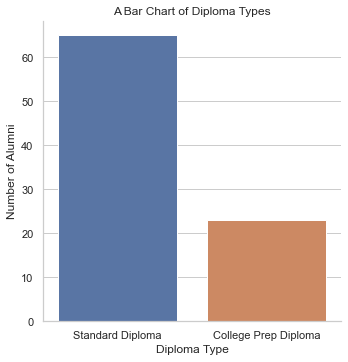

In [23]:
# Create a list of the Diploma Type column with the count of each categorical variable
alumni_per_diploma = df_copy['Diploma Type'].value_counts()
# Create a data frame from the above created list
alumni_per_diploma = pd.DataFrame(alumni_per_diploma)
alumni_per_diploma.reset_index(drop = False, inplace=True)
# Rename the created column names to 'Diploma Type' and 'Count'
alumni_per_diploma.rename(columns={"index":"Diploma","Diploma Type":"Count"},inplace=True)
alumni_per_diploma
# Using the Seaborn Library
# Set the theme style to 'whitegrid'
sns.set_theme(style='whitegrid')
# Plot the extracted dataset 'alumni_per_diploma'
sns.catplot(x= 'Diploma',
            y = 'Count',
            data = alumni_per_diploma,
            kind = 'bar',
            ci = 'None'
)
plt.xlabel('Diploma Type')
plt.ylabel('Number of Alumni')
plt.title('A Bar Chart of Diploma Types')
plt.show()

# # Alternatively use this 'countplot ()' function directly to the original dataset - dy_copy
# sns.catplot(x= 'Diploma Type',
#             data = df_copy,
#             kind = 'count',
#             ci = 'None'
# )
# plt.xlabel('Diploma Type')
# plt.ylabel('Number of Alumni')
# plt.title('A Bar Chart of Diploma Types')
# plt.show()

b) Now create a box plot comparison between 'Savings' and 'Salary' columns

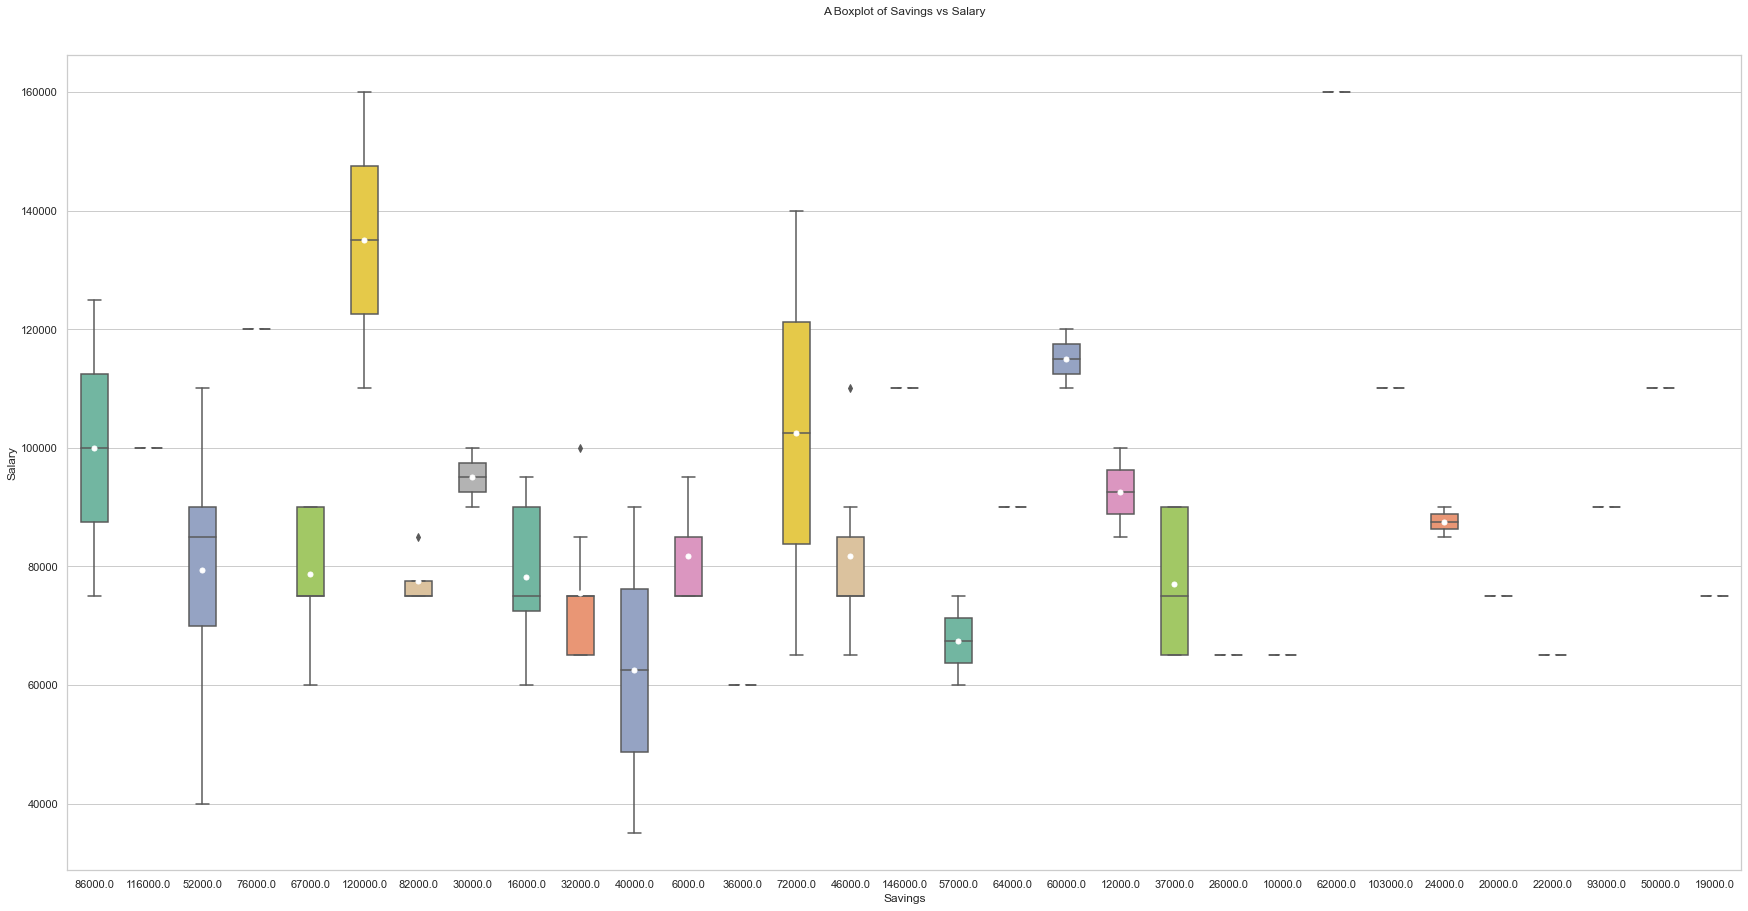

In [24]:
#b) (1)
# Enlarge the figure size for all numeric points to be displayed well. 
plt.figure(figsize= (30,15))
sns.boxplot(x = 'Savings',
            y = 'Salary',
            data = df_copy,
            orient = 'v',
            palette="Set2",
            width = 0.5,
            # Use 'Showmeans' to display markers for means
            showmeans = True,
            # Format the display markers for the means
            meanprops = {"marker" :'o', 'markerfacecolor' : 'white', 'markersize' : "5", "markeredgecolor" : 'white'}
)
plt.title('A Boxplot of Savings vs Salary', pad = 40)
plt.show()

c) Generate a histogram with the 'Salary' column and use 12 bins.

167000
167000


<Figure size 2160x1080 with 0 Axes>

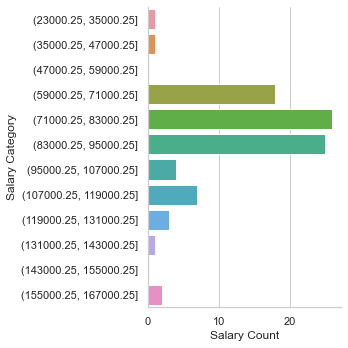

In [39]:
#c) (1) Creating bins? 
# df_copy.head(10)
# df_copy.tail()
print(df_copy['Salary'].max())
print (df_copy['Salary'].min())
#Generate discretised bucket of categories for the range between (35,000 to 170,000); Each bin contains 7.25 row values in between
discrete_ranges = [f"{df_copy['Salary'] + 0.25} - {df_copy['Salary'] + 7}" for df_copy['Salary'] in range (35000, 170000,12000)]
list(discrete_ranges)
# Create list of bins to use in cut function
bin = [23000.25, 35000.25, 47000.25, 59000.25, 71000.25, 83000.25, 95000.25, 107000.25, 119000.25, 131000.25, 143000.25, 155000.25, 167000.25]
# Create a column for the Salary Category for the ranges
df_copy['Salary Category'] = pd.cut(x=df['Salary'], bins = bin)
df_copy.head()
# Make a list of the bins created above with the count of each salary value
Salary_Ranges = df_copy['Salary Category'].value_counts()
# Create a data frame from the above created list
Salary_Ranges = pd.DataFrame(Salary_Ranges)
Salary_Ranges.reset_index(drop = False, inplace=True)
Salary_Ranges
# Rename the created column names to 'Diploma Type' and 'Count'
Salary_Ranges.rename(columns={"index":"Salary Category","Salary Category":"Salary Count"},inplace=True)
Salary_Ranges.drop([10,11], inplace = True)
Salary_Ranges
# Plot bar for Salary Categories and Salary Counts
sns.set_context('notebook', font_scale=1, rc={'lines.linewidth': 1, 'grid.linewidth': 1})
sns.catplot(data=Salary_Ranges, kind="bar", x="Salary Count", y="Salary Category")
plt.show()

d) Generate a scatter plot comparing 'Salary' and 'Savings' columns.

In [44]:
df_copy.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings,Salary Category
0,2004,Male,Single,Standard Diploma,Yes,167000,10869,"$86,000",86000.0,"(119000.25, 131000.25]"
1,2005,Male,Married,College Prep Diploma,No,167000,10869,"$116,000",116000.0,"(95000.25, 107000.25]"
2,2006,Female,Single,Standard Diploma,Yes,167000,10869,"$52,000",52000.0,"(59000.25, 71000.25]"
3,2007,Male,Married,Standard Diploma,No,167000,10869,"$76,000",76000.0,"(119000.25, 131000.25]"
4,2006,Female,Divorced,Standard Diploma,Yes,167000,11948,"$52,000",52000.0,"(83000.25, 95000.25]"


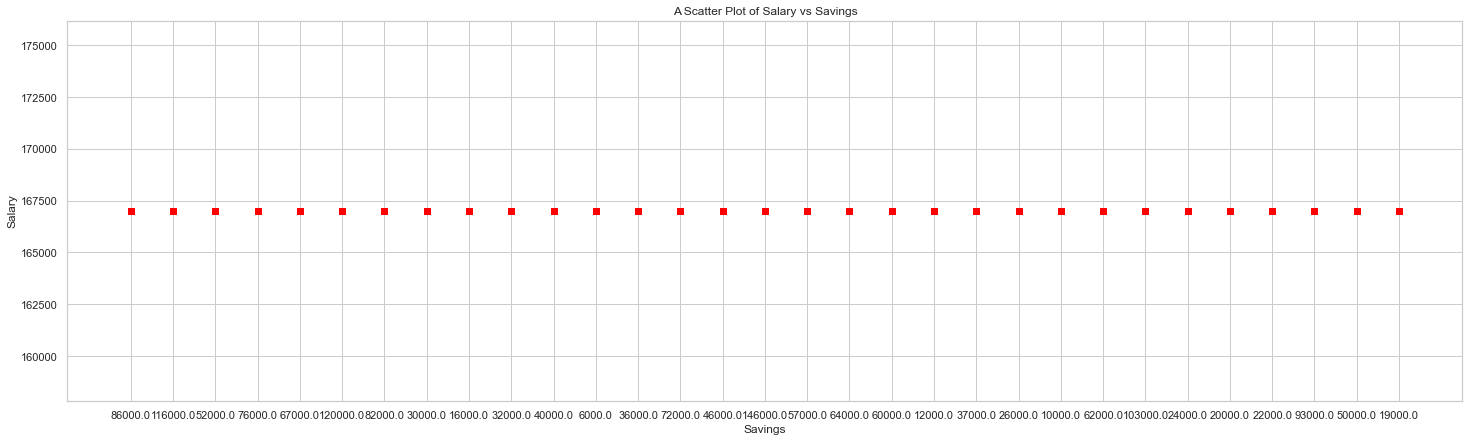

In [49]:
#d) (1)
x = df_copy['Savings']
y = df_copy['Salary']
fig1, ax1 = plt.subplots(figsize=(25,7))
ax1.scatter(x,y, c='red',marker='s')
ax1.set_title("A Scatter Plot of Salary vs Savings")
ax1.set_ylabel('Salary')
ax1.set_xlabel('Savings')
plt.show()

### Question 7 :  Contingency Table (2 Marks)

Using both the 'Martial Status' and 'Defaulted' create a contingency table. Hint: crosstab

In [50]:
# Q7 (2)
pd.crosstab(df_copy['Marital Status'], df_copy['Defaulted'])

Defaulted,No,Yes
Marital Status,,
Divorced,8,11
Married,19,16
Single,9,25
